<a href="https://colab.research.google.com/github/issacpv/20Time/blob/main/SKLLR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# SKlearn Logistic Regression
!pip install opendatasets --upgrade --quiet

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, f1_score, confusion_matrix
import opendatasets as od
import pandas as pd
import numpy as np

In [2]:
# Get the data from kaggle
dataset = 'https://www.kaggle.com/competitions/bioinformatics-hackathon-prg/data'
od.download(dataset)
df = pd.read_csv('bioinformatics-hackathon-prg/train.csv', index_col = 0)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: issacvarghese
Your Kaggle Key: ··········


100%|██████████| 4.69M/4.69M [00:00<00:00, 50.7MB/s]


Extracting archive ./bioinformatics-hackathon-prg/bioinformatics-hackathon-prg.zip to ./bioinformatics-hackathon-prg


In [3]:
# Encode protein sequences
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(df['Sequence'].values.reshape(-1, 1)).toarray()

In [4]:
def aa_composition(sequence):
    composition = {}
    for aa in sequence:
        if aa in composition:
            composition[aa] += 1
        else:
            composition[aa] = 1
    return composition

# Prepare the data
y = df['Label'].values
features = df['Sequence'].apply(aa_composition)
features_df = pd.DataFrame(features.tolist()).fillna(0)
X = features_df.values

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=29)

# Create the model
model = LogisticRegression(class_weight={0: 1/0.91, 1: 1/0.09}, random_state=29)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 1.0989010989010988, 1: 11.11111111111111},
                   random_state=29)

In [6]:
# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Set the manual threshold and generate predictions based on the threshold
threshold = 0.55
y_pred = (y_probs >= threshold).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.94      0.77      0.84      2576
           1       0.17      0.47      0.25       257

    accuracy                           0.74      2833
   macro avg       0.55      0.62      0.54      2833
weighted avg       0.87      0.74      0.79      2833

0.24564994882292734
Confusion Matrix:
[[1976  600]
 [ 137  120]]


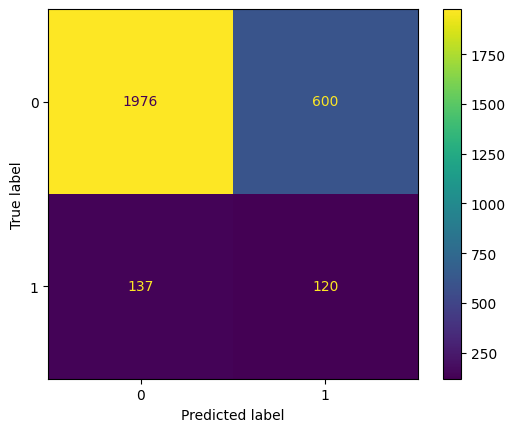

In [7]:
# Print the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))
print("Confusion Matrix:")
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()